In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('recipes_muffins_cupcakes.csv')

In [43]:
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
Type             20 non-null object
Flour            20 non-null int64
Milk             20 non-null int64
Sugar            20 non-null int64
Butter           20 non-null int64
Egg              20 non-null int64
Baking Powder    20 non-null int64
Vanilla          20 non-null int64
Salt             20 non-null int64
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


In [45]:
df.corr()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
Flour,1.000000,0.653965,-0.823497,-0.663835,-0.612530,0.333677,-0.584768,NaN
Milk,0.653965,1.000000,-0.756611,-0.773610,-0.677137,0.387600,-0.399741,NaN
Sugar,-0.823497,-0.756611,1.000000,0.449314,0.443047,-0.482146,0.394677,NaN
Butter,-0.663835,-0.773610,0.449314,1.000000,0.511927,-0.194494,0.448743,NaN
Egg,-0.612530,-0.677137,0.443047,0.511927,1.000000,-0.290259,0.475739,NaN
Baking Powder,0.333677,0.387600,-0.482146,-0.194494,-0.290259,1.000000,-0.140028,NaN
Vanilla,-0.584768,-0.399741,0.394677,0.448743,0.475739,-0.140028,1.000000,NaN
Salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


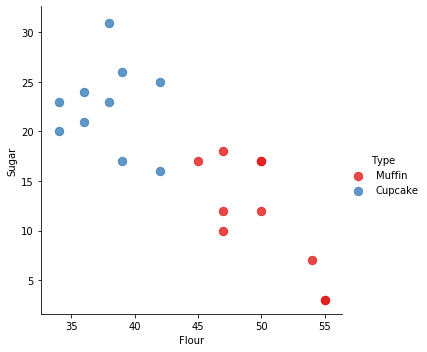

In [54]:

# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=df, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

## fit the model


In [51]:

# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = df[['Flour','Sugar']].as_matrix()
type_label = np.where(df['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = df.columns.values[1:].tolist()
recipe_features

/home/madanmaram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

# model fitting

In [56]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

<IPython.core.display.Javascript object>

SVC(kernel='linear')

# visulise results

In [58]:

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

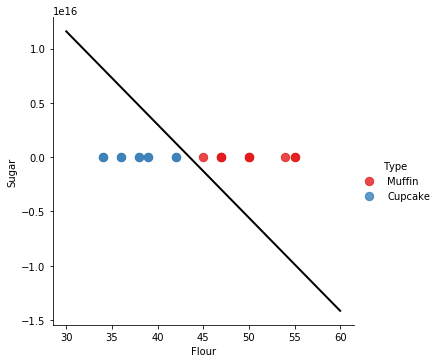

In [59]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

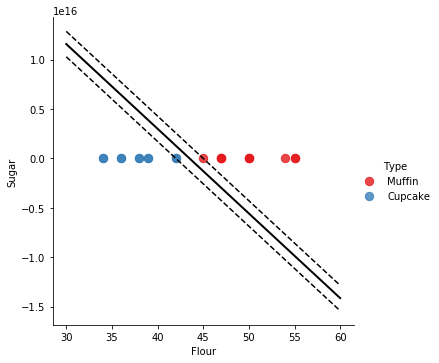

In [61]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [62]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [63]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


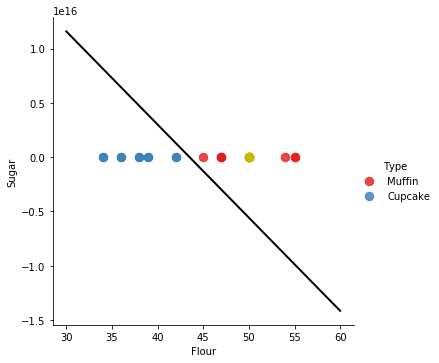

In [65]:

# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [66]:

# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


In [67]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [68]:
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(kernel='linear'),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}

In [69]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

<IPython.core.display.Javascript object>

In [70]:
# S = String
pickle.dumps(muffin_cupcake_dict)

<IPython.core.display.Javascript object>

b'\x80\x03}q\x00(X\x14\x00\x00\x00muffin_cupcake_modelq\x01csklearn.svm._classes\nSVC\nq\x02)\x81q\x03}q\x04(X\x17\x00\x00\x00decision_function_shapeq\x05X\x03\x00\x00\x00ovrq\x06X\n\x00\x00\x00break_tiesq\x07\x89X\x06\x00\x00\x00kernelq\x08X\x06\x00\x00\x00linearq\tX\x06\x00\x00\x00degreeq\nK\x03X\x05\x00\x00\x00gammaq\x0bX\x05\x00\x00\x00scaleq\x0cX\x05\x00\x00\x00coef0q\rG\x00\x00\x00\x00\x00\x00\x00\x00X\x03\x00\x00\x00tolq\x0eG?PbM\xd2\xf1\xa9\xfcX\x01\x00\x00\x00Cq\x0fG?\xf0\x00\x00\x00\x00\x00\x00X\x02\x00\x00\x00nuq\x10G\x00\x00\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00epsilonq\x11G\x00\x00\x00\x00\x00\x00\x00\x00X\t\x00\x00\x00shrinkingq\x12\x88X\x0b\x00\x00\x00probabilityq\x13\x89X\n\x00\x00\x00cache_sizeq\x14K\xc8X\x0c\x00\x00\x00class_weightq\x15NX\x07\x00\x00\x00verboseq\x16\x89X\x08\x00\x00\x00max_iterq\x17J\xff\xff\xff\xffX\x0c\x00\x00\x00random_stateq\x18NX\x07\x00\x00\x00_sparseq\x19\x89X\x0e\x00\x00\x00n_features_in_q\x1aK\x02X\r\x00\x00\x00class_weight_q\x1bcnumpy.cor